#New York Airbnb Price Prediction

Data Source: http://insideairbnb.com/get-the-data/

Goal: Predict Airbnb prices

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/DS5110 IDMP/data/listings.csv'
raw_price_data = pd.read_csv(file_path)
raw_price_data.head()

<ipython-input-2-1d8c9f59adae>:4: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_price_data = pd.read_csv(file_path)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20221204162430,2022-12-05,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,...,4.80,4.81,4.40,NaN,f,3,3,0,0,0.31
1,5203,https://www.airbnb.com/rooms/5203,20221204162430,2022-12-05,previous scrape,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,https://a0.muscache.com/pictures/103776/b37157...,7490,...,4.95,4.94,4.92,NaN,f,1,0,1,0,0.73
2,5136,https://www.airbnb.com/rooms/5136,20221204162430,2022-12-04,city scrape,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,...,5.00,4.67,5.00,NaN,f,1,1,0,0,0.03
3,5121,https://www.airbnb.com/rooms/5121,20221204162430,2022-12-05,city scrape,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.30
4,6848,https://www.airbnb.com/rooms/6848,20221204162430,2022-12-05,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,...,4.80,4.67,4.56,NaN,f,1,1,0,0,1.13


In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
raw_price_data.head().T

,0,1,2,3,4
id,2595,5203,5136,5121,6848
listing_url,https://www.airbnb.com/rooms/2595,https://www.airbnb.com/rooms/5203,https://www.airbnb.com/rooms/5136,https://www.airbnb.com/rooms/5121,https://www.airbnb.com/rooms/6848
scrape_id,20221204162430,20221204162430,20221204162430,20221204162430,20221204162430
last_scraped,2022-12-05,2022-12-05,2022-12-04,2022-12-05,2022-12-05
source,city scrape,previous scrape,city scrape,city scrape,city scrape
name,Skylit Midtown Castle,Cozy Clean Guest Room - Family Apt,"Spacious Brooklyn Duplex, Patio + Garden",BlissArtsSpace!,Only 2 stops to Manhattan studio
description,"Beautiful, spacious skylit studio in the heart...","Our best guests are seeking a safe, clean, spa...",We welcome you to stay in our lovely 2 br dupl...,One room available for rent in a 2 bedroom apt...,Comfortable studio apartment with super comfor...
neighborhood_overview,Centrally located in the heart of Manhattan ju...,Our neighborhood is full of restaurants and ca...,NaN,NaN,NaN
picture_url,https://a0.muscache.com/pictures/f0813a11-40b2...,https://a0.muscache.com/pictures/103776/b37157...,https://a0.muscache.com/pictures/miso/Hosting-...,https://a0.muscache.com/pictures/2090980c-b68e...,https://a0.muscache.com/pictures/e4f031a7-f146...
host_id,2845,7490,7378,7356,15991


## Exploratory Data Analysis and Preprocessing


In [ ]:
raw_price_data.shape, raw_price_data.columns

((41533, 75),
 Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
        'description', 'neighborhood_overview', 'picture_url', 'host_id',
        'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
        'host_response_time', 'host_response_rate', 'host_acceptance_rate',
        'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
        'host_neighbourhood', 'host_listings_count',
        'host_total_listings_count', 'host_verifications',
        'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
        'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
        'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
        'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
        'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
        'maximum_minimum_nights', 'minimum_maximum_nights',
        'maximum_maximum_nights', 'minimum_nights_avg_ntm',
        

There are too many features. We won't use all of them.

Personal information about the host - host name, location, neighborhood should not be fed to a model in order to prevent any biases.

Scraping information is also not relevant for this particular problem.

Neighbourhood has a grouped cleansed version so no need of the actual.

In [ ]:
cols = ['id',
        'host_response_time', 'host_response_rate', 'host_acceptance_rate',
        'host_is_superhost',
        'host_has_profile_pic', 'host_identity_verified',
        'neighbourhood_group_cleansed', 'latitude',
        'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bathrooms',
        'bedrooms', 'beds', 'amenities', 'price',
        'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
        'maximum_minimum_nights', 'minimum_maximum_nights',
        'maximum_maximum_nights', 'minimum_nights_avg_ntm',
        'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
        'availability_30', 'availability_60', 'availability_90',
        'availability_365', 'number_of_reviews',
        'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
        'last_review', 'review_scores_rating', 'review_scores_accuracy',
        'review_scores_cleanliness', 'review_scores_checkin',
        'review_scores_communication', 'review_scores_location',
        'review_scores_value', 
        'license', 'instant_bookable',
        'calculated_host_listings_count',
        'calculated_host_listings_count_entire_homes',
        'calculated_host_listings_count_private_rooms',
        'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

In [ ]:
price_data = raw_price_data.loc[:, cols]

In [ ]:
nulls = pd.DataFrame(price_data.isna().sum())
rows, cols = price_data.shape
for idx, row in nulls.iterrows():
  if row[0] >0:
    print(idx, row[0], "-", round((row[0]/rows)*100,2))

host_response_time 13645 - 32.85
host_response_rate 13645 - 32.85
host_acceptance_rate 12211 - 29.4
host_is_superhost 29 - 0.07
host_has_profile_pic 5 - 0.01
host_identity_verified 5 - 0.01
bathrooms_text 77 - 0.19
bathrooms 41533 - 100.0
bedrooms 3822 - 9.2
beds 941 - 2.27
minimum_minimum_nights 14 - 0.03
maximum_minimum_nights 14 - 0.03
minimum_maximum_nights 14 - 0.03
maximum_maximum_nights 14 - 0.03
minimum_nights_avg_ntm 14 - 0.03
maximum_nights_avg_ntm 14 - 0.03
calendar_updated 41533 - 100.0
first_review 9393 - 22.62
last_review 9393 - 22.62
review_scores_rating 9393 - 22.62
review_scores_accuracy 9841 - 23.69
review_scores_cleanliness 9831 - 23.67
review_scores_checkin 9845 - 23.7
review_scores_communication 9836 - 23.68
review_scores_location 9848 - 23.71
review_scores_value 9848 - 23.71
license 41532 - 100.0
reviews_per_month 9393 - 22.62


In [ ]:
price_data['calendar_updated'].unique()

array([nan])

In [ ]:
price_data['bathrooms'].unique()

array([nan])

In [ ]:
price_data['license'].unique()

array([nan, '41662/AL'], dtype=object)

So we can drop the columns - calendar_updated and bathrooms - as they are all/mostly null.

In [ ]:
price_data.drop(columns=['calendar_updated', 'bathrooms', 'license'], inplace=True)

In [ ]:
price_data.dtypes

id                                                int64
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                                object
host_has_profile_pic                             object
host_identity_verified                           object
neighbourhood_group_cleansed                     object
latitude                                        float64
longitude                                       float64
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms_text                                   object
bedrooms                                        float64
beds                                            float64
amenities                                        object
price                                           

In [ ]:
price_data['instant_bookable'].unique() # need to convert to bool

array(['f', 't'], dtype=object)

In [ ]:
price_data['host_response_time'].unique() # convert to categorical

array(['within a day', nan, 'within an hour', 'within a few hours',
       'a few days or more'], dtype=object)

In [ ]:
price_data['host_response_rate'].unique() # need to remove percentages and convert to int - impute nans

array(['72%', nan, '90%', '100%', '94%', '33%', '80%', '60%', '91%',
       '99%', '0%', '93%', '67%', '83%', '50%', '88%', '78%', '92%',
       '63%', '75%', '82%', '86%', '70%', '71%', '89%', '96%', '40%',
       '73%', '20%', '98%', '97%', '64%', '85%', '87%', '25%', '62%',
       '43%', '84%', '56%', '58%', '95%', '38%', '13%', '10%', '22%',
       '65%', '17%', '14%', '44%', '81%', '79%', '57%', '61%', '77%',
       '69%', '26%', '55%', '76%', '30%', '29%', '46%', '68%', '31%',
       '74%', '53%', '54%', '41%', '51%'], dtype=object)

In [ ]:
price_data['host_acceptance_rate'].unique() # need to remove percentages and convert to int - impute nans

array(['22%', nan, '50%', '82%', '100%', '13%', '54%', '98%', '96%',
       '97%', '0%', '83%', '95%', '86%', '85%', '46%', '40%', '67%',
       '10%', '25%', '99%', '87%', '88%', '33%', '38%', '20%', '61%',
       '73%', '60%', '65%', '64%', '30%', '94%', '89%', '91%', '93%',
       '78%', '35%', '5%', '36%', '75%', '53%', '43%', '39%', '70%',
       '80%', '92%', '23%', '17%', '49%', '76%', '63%', '69%', '57%',
       '74%', '62%', '79%', '21%', '90%', '84%', '14%', '71%', '81%',
       '77%', '55%', '72%', '15%', '29%', '44%', '45%', '47%', '19%',
       '56%', '68%', '28%', '52%', '59%', '34%', '48%', '27%', '18%',
       '66%', '58%', '7%', '42%', '11%', '32%', '16%', '51%', '26%',
       '12%', '41%', '37%', '4%', '8%', '31%', '9%', '6%', '24%'],
      dtype=object)

In [ ]:
price_data['host_is_superhost'].unique() # need to convert to bool - impute nans

array(['f', 't', nan], dtype=object)

In [ ]:
price_data['host_has_profile_pic'].unique() # need to convert to bool - impute nans

array(['t', 'f', nan], dtype=object)

In [ ]:
price_data['host_identity_verified'].unique() # need to convert to bool - impute nans

array(['t', 'f', nan], dtype=object)

Also change instant_bookable and has_availability to bool

In [ ]:
price_data['neighbourhood_group_cleansed'].unique() # one hot or word to vec

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [ ]:
price_data['property_type'].unique() # too many - room type is cleaned version of this so drop

array(['Entire rental unit', 'Private room in rental unit',
       'Private room in condo', 'Entire guest suite',
       'Private room in loft', 'Entire loft', 'Private room in townhouse',
       'Private room in home', 'Entire condo', 'Entire home',
       'Entire townhouse', 'Room in boutique hotel',
       'Entire serviced apartment', 'Private room in bed and breakfast',
       'Entire guesthouse', 'Private room in guest suite',
       'Shared room in loft', 'Shared room in rental unit',
       'Private room in houseboat', 'Shared room in home', 'Private room',
       'Entire place', 'Private room in guesthouse', 'Boat',
       'Room in aparthotel', 'Room in serviced apartment',
       'Entire cottage', 'Private room in religious building',
       'Private room in serviced apartment', 'Cave', 'Tiny home',
       'Entire bungalow', 'Shared room in condo', 'Floor',
       'Room in hotel', 'Private room in hostel',
       'Shared room in townhouse', 'Houseboat',
       'Private room in

In [ ]:
property_map = {
  'Apartment': ['Entire rental unit', 'Private room in rental unit', 'Entire serviced apartment', 'Shared room in rental unit',
               'Room in aparthotel', 'Room in serviced apartment', 'Private room in serviced apartment', 'Entire home/apt',
               'Shared room in serviced apartment'], 
 "House/Villa": ['Private room in condo', 'Private room in loft','Entire loft', 'Private room in townhouse',
                 'Private room in home','Entire condo', 'Entire home','Entire townhouse','Entire guesthouse', 'Shared room in loft', 'Shared room in home',
                 'Entire place', 'Private room in guesthouse', 'Entire cottage','Tiny home', 'Entire bungalow', 'Shared room in condo', 'Shared room in townhouse'
                 'Private room in bungalow', 'Entire villa', 'Private room in villa', 'Private room in in-law', 'Shared room in guesthouse',
                 'Private room in tiny home', 'Private room in vacation home', 'Shared room in bungalow', 'Private room in earthen home', 'Private room in cottage',
                 'Entire vacation home', 'Shared room in vacation home', 'Shared room'],
 "Hotel": ['Entire guest suite', 'Room in boutique hotel','Private room in bed and breakfast', 'Private room in guest suite', 'Private room', 
           'Room in hotel', 'Private room in hostel', 'Private room in resort', 'Shared room in guest suite', 'Entire bed and breakfast',
           'Room in resort', 'Shared room in bed and breakfast', 'Private room in dorm', 'Room in bed and breakfast'], 
 "Other": ['Private room in houseboat', 'Boat', 'Private room in religious building', 'Cave', 'Floor', 'Houseboat', 'Shared room in floor', 
           'Private room in floor', 'Private room in casa particular', 'Private room in tent', 'Private room in farm stay', 'Private room in barn',
           'Lighthouse', 'Private room in train', 'Barn', 'Private room in lighthouse', 'Casa particular', 'Camper/RV', 'Private room in camper/rv', 
           'Private room in kezhan', 'Castle', 'Tent', 'Private room in minsu', 'Private room in tower', 'Shared room in casa particular', 
           "Shared room in shepherd's hut"]
 }

def map_to_property(s: str):
  for key, li in property_map.items():
    if s in property_map[key]:
      return key

price_data['property_type'] = price_data['property_type'].apply(map_to_property)

In [ ]:
price_data['property_type'].value_counts()

Apartment      29870
House/Villa     9355
Hotel           2120
Other            174
Name: property_type, dtype: int64

In [ ]:
# price_data.drop(columns=['property_type'], inplace=True)

In [ ]:
price_data['room_type'].unique() # Basically cleaned property type? So drop property type

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [ ]:
price_data['bathrooms_text'].unique() # change to numeric - impute nans

array(['1 bath', '1 shared bath', '1.5 baths', nan, '1 private bath',
       '2 baths', '2.5 baths', '3 baths', '1.5 shared baths',
       '2 shared baths', 'Half-bath', '0 baths', '4 baths',
       '0 shared baths', 'Shared half-bath', 'Private half-bath',
       '5.5 baths', '4.5 baths', '2.5 shared baths', '3.5 baths',
       '15.5 baths', '5 baths', '3 shared baths', '4 shared baths',
       '6 baths', '3.5 shared baths', '4.5 shared baths', '6.5 baths',
       '7 baths', '6 shared baths', '8 baths'], dtype=object)

In [ ]:
price_data['amenities'].unique() # bag of words? word2vec?

array(['["Carbon monoxide alarm", "Stove", "Bathtub", "TV", "Kitchen", "Iron", "Long term stays allowed", "Essentials", "Bed linens", "Self check-in", "Free street parking", "Keypad", "Refrigerator", "Ethernet connection", "Extra pillows and blankets", "Cleaning available during stay", "Dedicated workspace", "Air conditioning", "Coffee maker", "Smoke alarm", "Heating", "Hot water", "Wifi", "Oven", "Luggage dropoff allowed", "Paid parking off premises", "Cooking basics", "Hangers", "Baking sheet", "Dishes and silverware", "Fire extinguisher", "Hair dryer"]',
       '["Hair dryer", "Smoke alarm", "Carbon monoxide alarm", "Shampoo", "Heating", "Hot water", "Wifi", "Fire extinguisher", "Free street parking", "Elevator", "Paid parking off premises", "Host greets you", "Breakfast", "Essentials", "Air conditioning"]',
       '["HDTV with Disney+, HBO Max, standard cable, Roku, Netflix", "Smoke alarm", "Carbon monoxide alarm", "Private backyard \\u2013 Fully fenced", "Outdoor dining area", "Wa

In [ ]:
price_data['first_review'].unique() # first review and last review to datetime - only for analysis - no need for model

array(['2009-11-21', '2009-09-07', '2014-01-02', ..., '2022-11-11',
       '2022-11-29', '2022-11-18'], dtype=object)

In [ ]:
def convert_str_to_bool(var: str):
  
  if var == 't':
    return True
  else:
    return False

def remove_char_from_str(var, chars):
  
  if not pd.isnull(var):
    for char in chars:
      var = var.replace(char, '')
    return float(var)
  
  return var
  
def baths_str_to_num(var: str):
  
  if not pd.isnull(var):
    words = var.lower().split(' ')

    if 'half-bath' in words:
      return 0.5
    else:
      return float(words[0])
  
  return var


price_data['instant_bookable'] = price_data['instant_bookable'].apply(convert_str_to_bool).astype(float)
price_data['host_is_superhost'] = price_data['host_is_superhost'].apply(convert_str_to_bool).astype(float)
price_data['host_has_profile_pic'] = price_data['host_has_profile_pic'].apply(convert_str_to_bool).astype(float)
price_data['host_identity_verified'] = price_data['host_identity_verified'].apply(convert_str_to_bool).astype(float)
price_data['has_availability'] = price_data['has_availability'].apply(convert_str_to_bool).astype(float)

price_data['host_response_rate'] = price_data['host_response_rate'].apply(remove_char_from_str, chars=['%'])
price_data['host_acceptance_rate'] = price_data['host_acceptance_rate'].apply(remove_char_from_str, chars=['%'])

price_data['price'] = price_data['price'].apply(remove_char_from_str, chars=['$',','])

price_data['baths_cleaned'] = price_data['bathrooms_text'].apply(baths_str_to_num)
price_data.drop(columns=['bathrooms_text'], inplace = True)

In [ ]:
price_data.head().T

,0,1,2,3,4
id,2595,5203,5136,5121,6848
host_response_time,within a day,NaN,NaN,within a day,within an hour
host_response_rate,72.0,NaN,NaN,90.0,100.0
host_acceptance_rate,22.0,NaN,50.0,82.0,100.0
host_is_superhost,0.0,0.0,0.0,1.0,0.0
host_has_profile_pic,1.0,1.0,1.0,1.0,1.0
host_identity_verified,1.0,1.0,1.0,1.0,1.0
neighbourhood_group_cleansed,Manhattan,Manhattan,Brooklyn,Brooklyn,Brooklyn
latitude,40.75356,40.8038,40.66265,40.68535,40.70935
longitude,-73.98559,-73.96751,-73.99454,-73.95512,-73.95342


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def histogram_plot(title, data):

  data = data.value_counts()

  x = list(data.keys())
  x = x[::-1]
    
  y = list(data)
  y = y[::-1]

  fig, ax = plt.subplots(1, 1)
  
  plt.barh(x,y)
  plt.title(title)

  return fig, ax

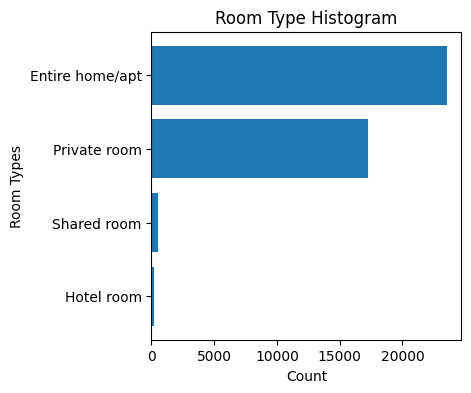

In [ ]:
fig, ax = histogram_plot('Room Type Histogram', price_data['room_type'])
fig.set_size_inches(4, 4)
ax.set_xlabel('Count')
ax.set_ylabel('Room Types');

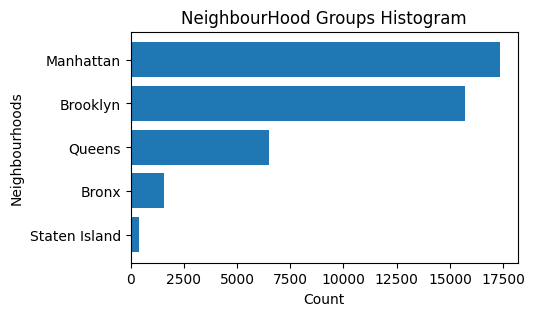

In [ ]:
fig, ax = histogram_plot('NeighbourHood Groups Histogram', price_data['neighbourhood_group_cleansed'])
fig.set_size_inches(5, 3)
ax.set_xlabel('Count')
ax.set_ylabel('Neighbourhoods');

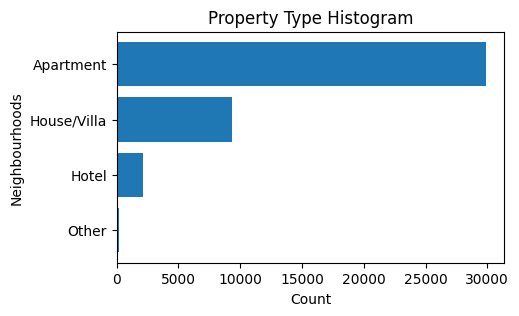

In [ ]:
fig, ax = histogram_plot('Property Type Histogram', price_data['property_type'])
fig.set_size_inches(5, 3)
ax.set_xlabel('Count')
ax.set_ylabel('Neighbourhoods');

<Axes: xlabel='price', ylabel='property_type'>

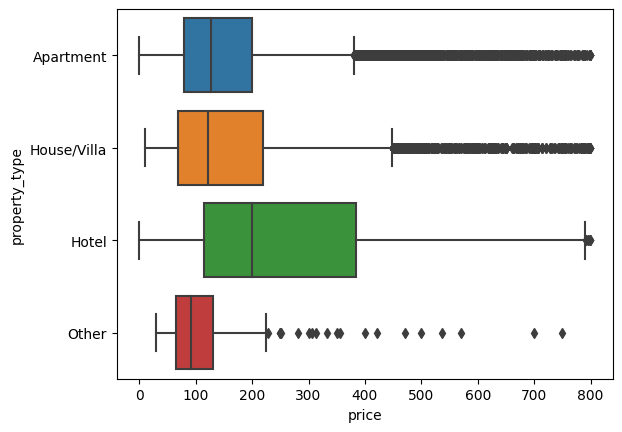

In [ ]:
import seaborn as sns

sns.boxplot(data=price_data[price_data['price'] <800], x="price", y="property_type")

<Axes: xlabel='price', ylabel='neighbourhood_group_cleansed'>

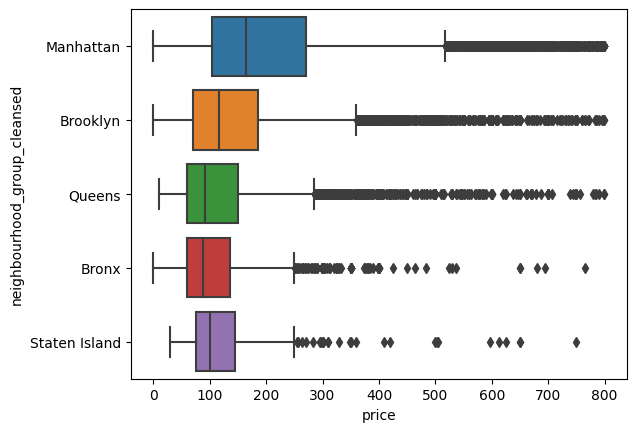

In [ ]:
import seaborn as sns

sns.boxplot(data=price_data[price_data['price'] <800], x="price", y="neighbourhood_group_cleansed")

<Axes: xlabel='price', ylabel='room_type'>

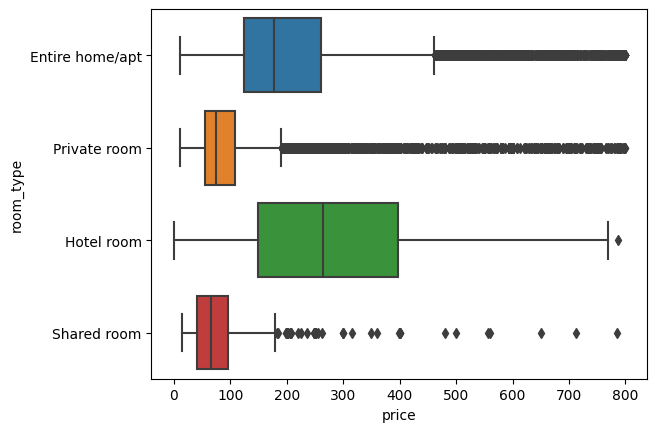

In [ ]:
import seaborn as sns

sns.boxplot(data=price_data[price_data['price'] < 800], x="price", y="room_type")

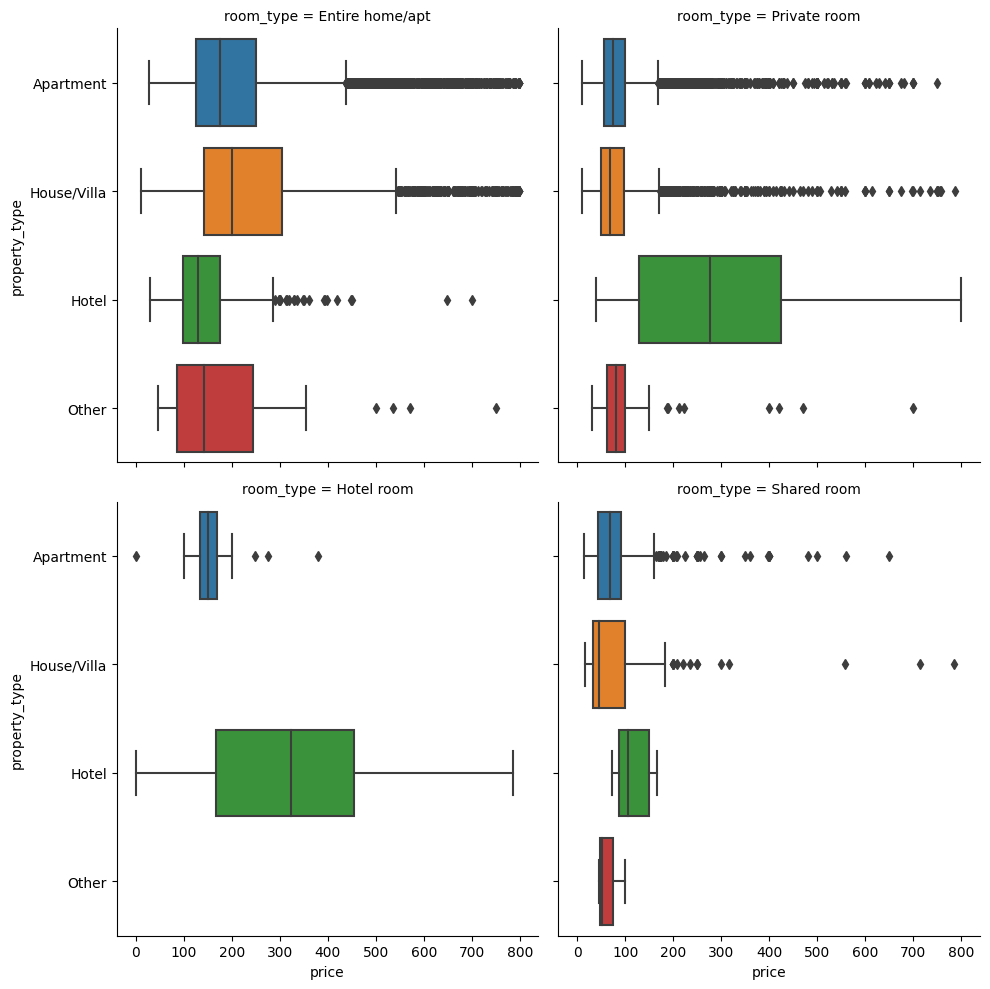

In [ ]:
sns.catplot(
    data=price_data[price_data['price'] < 800], x='price', y='property_type',
    col='room_type', kind='box', col_wrap=2
)

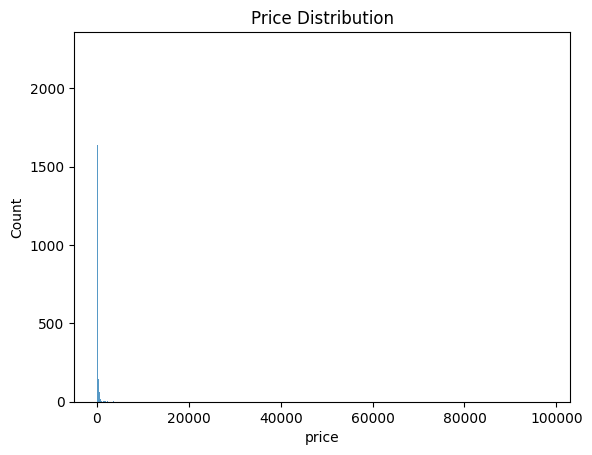

In [ ]:
import seaborn as sns

sns.histplot(price_data['price']).set(title = 'Price Distribution');

Highly skewed data 

In [ ]:
import numpy as np
price_data['log_price'] = price_data['price'].apply(np.log)

<Axes: xlabel='log_price', ylabel='Count'>

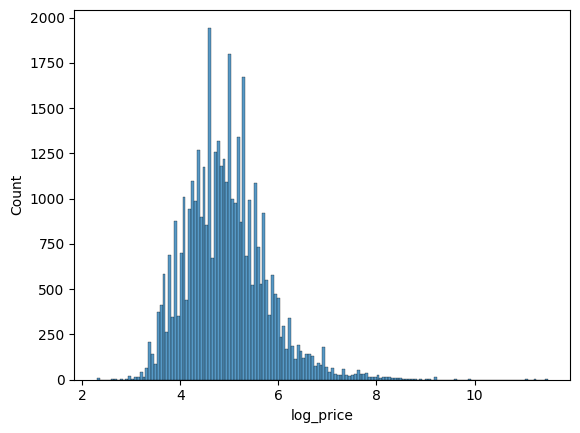

In [ ]:
sns.histplot(price_data['log_price'])

In [ ]:
price_data['price'].mean(), max(price_data['price'])

(221.97828232971372, 98159.0)

In [ ]:
len(price_data['price'][price_data['price'] >= 5000])

40

In [ ]:
price_data['price'][price_data['price'] >= 5000]

478       5560.0
1700      6000.0
1822      5250.0
1910      6500.0
2221      5143.0
2857      9990.0
2921     10000.0
3206      9999.0
6086      7314.0
7457      5000.0
7617      6000.0
8642     10000.0
9351     75120.0
9535      7184.0
9543     65115.0
11408     9000.0
12777    10000.0
16423    10000.0
18082     6500.0
19137     6364.0
19365    10000.0
19367    10000.0
19369    10000.0
19750    10000.0
21647     9999.0
23485     5000.0
24243     5000.0
25883     9994.0
26255     5965.0
28785     8389.0
28932    10000.0
30588     9999.0
31559    98159.0
32874    19750.0
34965    15000.0
37160    95110.0
38665     9999.0
40027     5000.0
41339     9999.0
41443     9999.0
Name: price, dtype: float64

In [ ]:
len(price_data['price'][price_data['price'] < 100])

14591

In [ ]:
price_data[price_data['price'] < 100].describe()

,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,baths_cleaned,log_price
count,1.459100e+04,8556.000000,9069.000000,14591.000000,14591.000000,14591.000000,14591.000000,14591.000000,14591.000000,13849.000000,14160.000000,14591.000000,14591.000000,14591.000000,14577.000000,14577.000000,14577.000000,14577.000000,14577.000000,14577.000000,14591.000000,14591.000000,14591.000000,14591.000000,14591.000000,14591.000000,14591.000000,14591.000000,11308.000000,11080.000000,11086.000000,11079.000000,11083.000000,11078.000000,11077.000000,14591.000000,14591.000000,14591.000000,14591.000000,14591.000000,11308.000000,14545.000000,1.459100e+04
mean,1.357843e+17,94.357527,79.892491,0.192653,0.986499,0.834144,40.726832,-73.926421,1.862312,1.076107,1.185946,65.616407,22.498115,605.681310,22.385676,22.790217,785.016258,787.683817,22.651417,787.145565,0.788842,6.340758,17.715235,29.901103,120.290796,25.083339,6.489960,0.553492,4.549093,4.714380,4.541941,4.792764,4.779915,4.658382,4.630938,0.162086,20.060106,1.389966,18.552190,0.115893,1.094611,1.124785,-inf
std,2.724463e+17,16.187618,29.595382,0.394396,0.115413,0.371964,0.065570,0.058006,0.894135,0.387353,0.550020,19.976906,35.890328,504.165291,35.935275,36.116134,475.578778,474.328586,36.011414,474.345042,0.408144,9.681252,21.509715,33.974736,142.193658,53.784708,14.240595,1.331796,0.837485,0.514575,0.628051,0.450990,0.489448,0.470308,0.542490,0.368543,62.947022,7.138563,61.532972,0.916269,1.530750,0.364188,NaN
min,5.121000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,40.520340,-74.205160,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,0.000000,-inf
25%,1.618402e+07,98.000000,74.000000,0.000000,1.000000,1.000000,40.682645,-73.956550,1.000000,1.000000,1.000000,50.000000,2.000000,60.000000,2.000000,3.000000,365.000000,365.000000,2.300000,365.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.500000,4.670000,4.400000,4.780000,4.770000,4.530000,4.530000,0.000000,1.000000,0.000000,1.000000,0.000000,0.090000,1.000000,3.912023e+00
50%,3.550798e+07,100.000000,94.000000,0.000000,1.000000,1.000000,40.712040,-73.937800,2.000000,1.000000,1.000000,66.000000,30.000000,365.000000,30.000000,30.000000,1125.000000,1125.000000,30.000000,1125.000000,1.000000,0.000000,1.000000,5.000000,43.000000,4.000000,0.000000,0.000000,4.780000,4.870000,4.740000,4.940000,4.940000,4.770000,4.780000,0.000000,2.000000,0.000000,1.000000,0.000000,0.400000,1.000000,4.189655e+00
75%,5.276106e+07,100.000000,100.000000,0.000000,1.000000,1.000000,40.766600,-73.907583,2.000000,1.000000,1.000000,81.000000,30.000000,1125.000000,30.000000,30.000000,1125.000000,1125.000000,30.000000,1125.000000,1.000000,11.000000,36.000000,63.000000,274.500000,23.000000,5.000000,0.000000,5.000000,5.000000,4.960000,5.000000,5.000000,5.000000,5.000000,0.000000,4.000000,1.000000,3.000000,0.000000,1.520000,1.000000,4.394449e+00
max,7.734908e+17,100.000000,100.000000,1.000000,1.000000,1.000000,40.910620,-73.712990,16.000

In [ ]:
len(price_data['price'][(price_data['price'] >= 100) & (price_data['price'] < 200)])

14547

In [ ]:
len(price_data['price'][price_data['price'] >= 200])

12395

In [ ]:
for i in range(100, 100000, 100):
  count = len(price_data['price'][(price_data['price'] >= i) & (price_data['price'] < (i+100))])
  if count > 0:
    print(i,"-",i+100, " count=", count)

100 - 200  count= 14547
200 - 300  count= 5984
300 - 400  count= 2726
400 - 500  count= 1081
500 - 600  count= 621
600 - 700  count= 405
700 - 800  count= 318
800 - 900  count= 184
900 - 1000  count= 227
1000 - 1100  count= 140
1100 - 1200  count= 78
1200 - 1300  count= 72
1300 - 1400  count= 31
1400 - 1500  count= 41
1500 - 1600  count= 50
1600 - 1700  count= 27
1700 - 1800  count= 26
1800 - 1900  count= 23
1900 - 2000  count= 35
2000 - 2100  count= 43
2100 - 2200  count= 16
2200 - 2300  count= 34
2300 - 2400  count= 16
2400 - 2500  count= 13
2500 - 2600  count= 28
2600 - 2700  count= 4
2700 - 2800  count= 8
2800 - 2900  count= 14
2900 - 3000  count= 6
3000 - 3100  count= 19
3100 - 3200  count= 3
3200 - 3300  count= 6
3300 - 3400  count= 3
3400 - 3500  count= 5
3500 - 3600  count= 10
3600 - 3700  count= 6
3700 - 3800  count= 7
3800 - 3900  count= 7
3900 - 4000  count= 5
4000 - 4100  count= 7
4100 - 4200  count= 5
4200 - 4300  count= 2
4300 - 4400  count= 2
4400 - 4500  count= 2
4500 -

In [ ]:
len(price_data['price'][price_data['price'] < 500])

38929

In [ ]:
len(price_data['price'][price_data['price'] >= 500])

2604

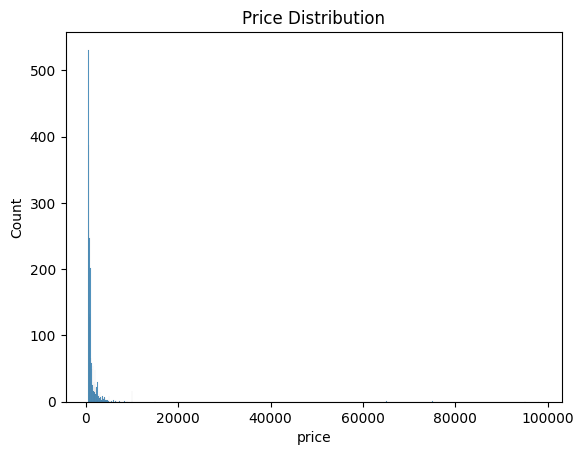

In [ ]:
sns.histplot(price_data['price'][price_data['price'] >= 500]).set(title = 'Price Distribution');

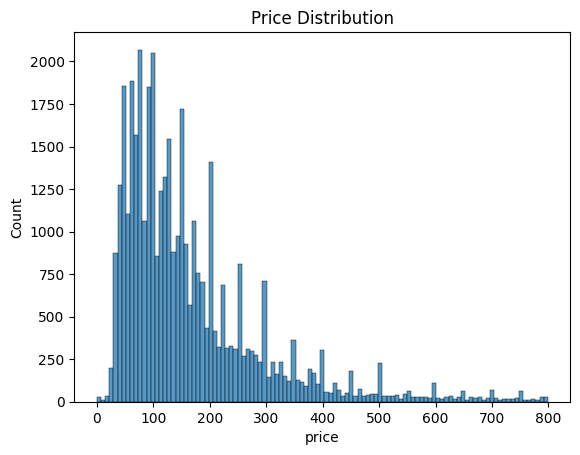

In [ ]:
sns.histplot(price_data['price'][price_data['price'] < 800]).set(title = 'Price Distribution');

predict log prices

In [ ]:
cols_fillna_most_freq=['beds','bedrooms','baths_cleaned','host_is_superhost','host_has_profile_pic','host_identity_verified', 
                           'host_response_time', 'reviews_per_month']

cols_fillna_mean=['host_response_rate','host_acceptance_rate','review_scores_rating', 'minimum_minimum_nights','maximum_minimum_nights', 
                  'minimum_maximum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 
                  'maximum_nights_avg_ntm', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                  'review_scores_communication', 'review_scores_location', 'review_scores_value']

cols_one_hot = ['host_response_time', 'room_type', 'neighbourhood_group_cleansed', 'property_type']

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

mean_imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
most_freq_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

In [ ]:
for col in cols_fillna_mean:
  print(col)
  price_data[col] = mean_imputer.fit_transform(price_data[col].values.reshape(-1,1))[:,0]
 
for col in cols_fillna_most_freq:
  price_data[col] = most_freq_imputer.fit_transform(price_data[col].values.reshape(-1,1))[:,0]


host_response_rate
host_acceptance_rate
review_scores_rating
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value


In [ ]:
for col in cols_one_hot:
  one_hot_encoded = pd.get_dummies(price_data[col])
  price_data = pd.concat([price_data, one_hot_encoded], axis=1)
  price_data.drop(columns=[col], inplace = True)

price_data.head()

,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,baths_cleaned,log_price,a few days or more,within a day,within a few hours,within an hour,Entire home/apt,Hotel room,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Apartment,Hotel,House/Villa,Other
0,2595,72.000000,22.00000,0.0,1.0,1.0,40.75356,-73.98559,1,1.0,1.0,"[""Carbon monoxide alarm"", ""Stove"", ""Bathtub"", ...",175.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,1.0,30,60,90,365,49,1,0,2009-11-21,2022-06-21,4.68,4.73,4.63,4.77,4.80,4.81,4.40,0.0,3,3,0,0,0.31,1.0,5.164786,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,5203,94.367075,82.86563,0.0,1.0,1.0,40.80380,-73.96751,1,1.0,1.0,"[""Hair dryer"", ""Smoke alarm"", ""Carbon monoxide...",75.0,2,14,2.0,2.0,14.0,14.0,2.0,14.0,1.0,0,0,0,0,118,0,0,2009-09-07,2017-07-21,4.91,4.83,4.82,4.97,4.95,4.94,4.92,0.0,1,0,1,0,0.73,1.0,4.317488,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
2,5136,94.367075,50.00000,0.0,1.0,1.0,40.66265,-73.99454,4,2.0,2.0,"[""HDTV with Disney+, HBO Max, standard cable, ...",275.0,21,1125,21.0,21.0,1125.0,1125.0,21.0,1125.0,1.0,0,0,0,267,3,1,0,2014-01-02,2022-08-10,5.00,5.00,5.00,5.00,5.00,4.67,5.00,0.0,1,1,0,0,0.03,1.5,5.616771,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0
3,5121,90.000000,82.00000,1.0,1.0,1.0,40.68535,-73.95512,2,1.0,1.0,"[""Heating"", ""Wifi"", ""Long term stays allowed"",...",60.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,1.0,11,17,47,322,50,0,0,2009-05-28,2019-12-02,4.52,4.22,4.09,4.91,4.91,4.47,4.52,0.0,2,0,2,0,0.30,1.0,4.094345,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
4,6848,100.000000,100.00000,0.0,1.0,1.0,40.70935,-73.95342,3,1.0,1.0,"[""Carbon monoxide alarm"", ""Shampoo"", ""Stove"", ...",68.0,30,730,30.0,30.0,1125.0,1125.0,30.0,1125.0,1.0,23,23,35,151,187,5,0,2009-05-25,2022-11-02,4.57,4.59,4.86,4.84,4.80,4.67,4.56,0.0,1,1,0,0,1.13,1.0,4.219508,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
def clean_str(s:str):
  for char in ['[',']','"',',']:
    s = s.replace(char, '')
  s = s.lower()
  return s

def wifi(s:str):
  if 'wifi' in s:
    return 1
  else:
    return 0
  
def kitchen(s:str):
  if 'kitchen' in s or 'cooking' in s or 'oven' in s or 'stove' in s or 'kitchenette' in s:
    return 1
  else:
    return 0

def ac(s:str):
  if 'ac' in s or 'air conditioner' in s:
    return 1
  else:
    return 0

def tv(s:str):
  if 'tv' in s or 'hdtv' in s:
    return 1
  else:
    return 0

def security(s:str):
  if 'security' in s:
    return 1
  else:
    return 0

def park(s:str):
  if 'parking' in s:
    return 1
  else:
    return 0


price_data['amenities'] = price_data['amenities'].apply(clean_str)
price_data['wifi'] = price_data['amenities'].apply(wifi)
price_data['ac'] = price_data['amenities'].apply(ac)
price_data['tv'] = price_data['amenities'].apply(tv)
price_data['security'] = price_data['amenities'].apply(security)
price_data['park'] = price_data['amenities'].apply(park)
price_data['kitchen'] = price_data['amenities'].apply(kitchen)

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# def join_str(s:str):
#   for char in ['[',']','"',',']:
#       s = s.replace(char, '')
#   s = s.lower().split(" ")
#   s.sort()

#   return "".join(s)

# price_data['joined_str'] = price_data['amenities'].apply(join_str)
# text_transformer = TfidfVectorizer(stop_words="english")
# # text_transformer.fit_transform(price_data['joined_str'].values).toarray()[:]

In [ ]:
price_data.head()

,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,baths_cleaned,log_price,a few days or more,within a day,within a few hours,within an hour,Entire home/apt,Hotel room,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Apartment,Hotel,House/Villa,Other,wifi,ac,tv,security,park,kitchen
0,2595,72.000000,22.00000,0.0,1.0,1.0,40.75356,-73.98559,1,1.0,1.0,carbon monoxide alarm stove bathtub tv kitchen...,175.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,1.0,30,60,90,365,49,1,0,2009-11-21,2022-06-21,4.68,4.73,4.63,4.77,4.80,4.81,4.40,0.0,3,3,0,0,0.31,1.0,5.164786,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,1,1
1,5203,94.367075,82.86563,0.0,1.0,1.0,40.80380,-73.96751,1,1.0,1.0,hair dryer smoke alarm carbon monoxide alarm s...,75.0,2,14,2.0,2.0,14.0,14.0,2.0,14.0,1.0,0,0,0,0,118,0,0,2009-09-07,2017-07-21,4.91,4.83,4.82,4.97,4.95,4.94,4.92,0.0,1,0,1,0,0.73,1.0,4.317488,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
2,5136,94.367075,50.00000,0.0,1.0,1.0,40.66265,-73.99454,4,2.0,2.0,hdtv with disney+ hbo max standard cable roku ...,275.0,21,1125,21.0,21.0,1125.0,1125.0,21.0,1125.0,1.0,0,0,0,267,3,1,0,2014-01-02,2022-08-10,5.00,5.00,5.00,5.00,5.00,4.67,5.00,0.0,1,1,0,0,0.03,1.5,5.616771,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,1
3,5121,90.000000,82.00000,1.0,1.0,1.0,40.68535,-73.95512,2,1.0,1.0,heating wifi long term stays allowed kitchen a...,60.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,1.0,11,17,47,322,50,0,0,2009-05-28,2019-12-02,4.52,4.22,4.09,4.91,4.91,4.47,4.52,0.0,2,0,2,0,0.30,1.0,4.094345,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
4,6848,100.000000,100.00000,0.0,1.0,1.0,40.70935,-73.95342,3,1.0,1.0,carbon monoxide alarm shampoo stove tv kitchen...,68.0,30,730,30.0,30.0,1125.0,1125.0,30.0,1125.0,1.0,23,23,35,151,187,5,0,2009-05-25,2022-11-02,4.57,4.59,4.86,4.84,4.80,4.67,4.56,0.0,1,1,0,0,1.13,1.0,4.219508,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,1


## Feature Engineering

Decision trees / Feature importance plots

consider Lasso/sparse regression

In [ ]:
price_data.replace([np.inf, -np.inf], np.nan, inplace=True)
price_data.dropna(inplace=True)

price_data_x = price_data[price_data['price'] < 800].drop(['id', 'amenities', 'first_review', 'last_review', 'price','log_price'], axis=1)

In [ ]:
X = price_data_x.values
y = price_data[price_data['price'] < 800].loc[:, 'log_price']

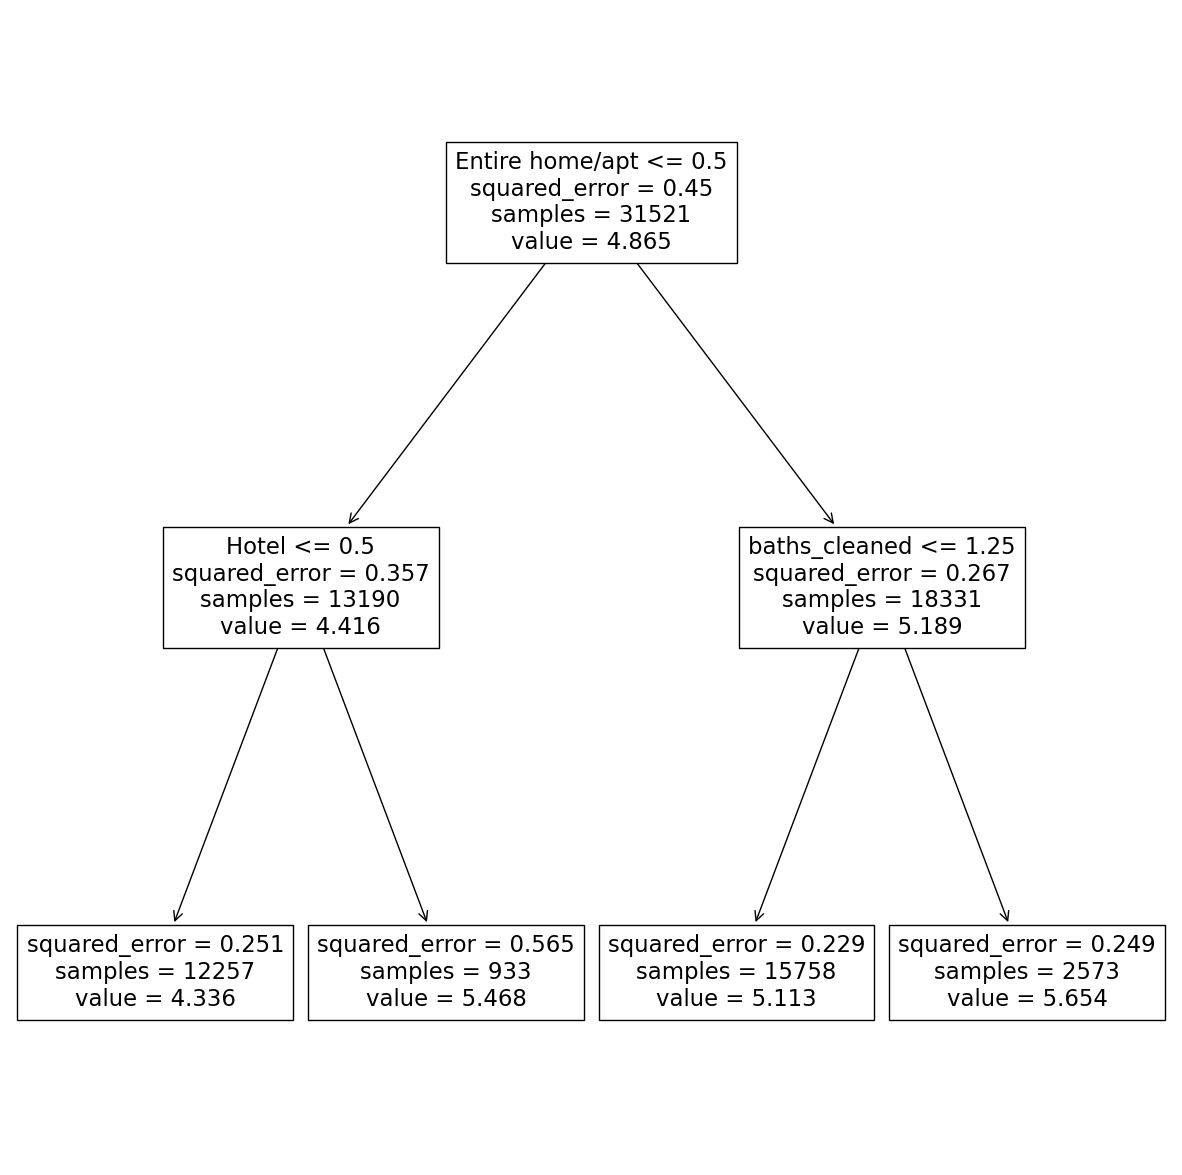

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
regressor = DecisionTreeRegressor(random_state=0, max_depth=2)
regressor.fit(X,y)
plt.figure(figsize=(15, 15))
tree.plot_tree(regressor, feature_names=price_data_x.columns)
plt.show()

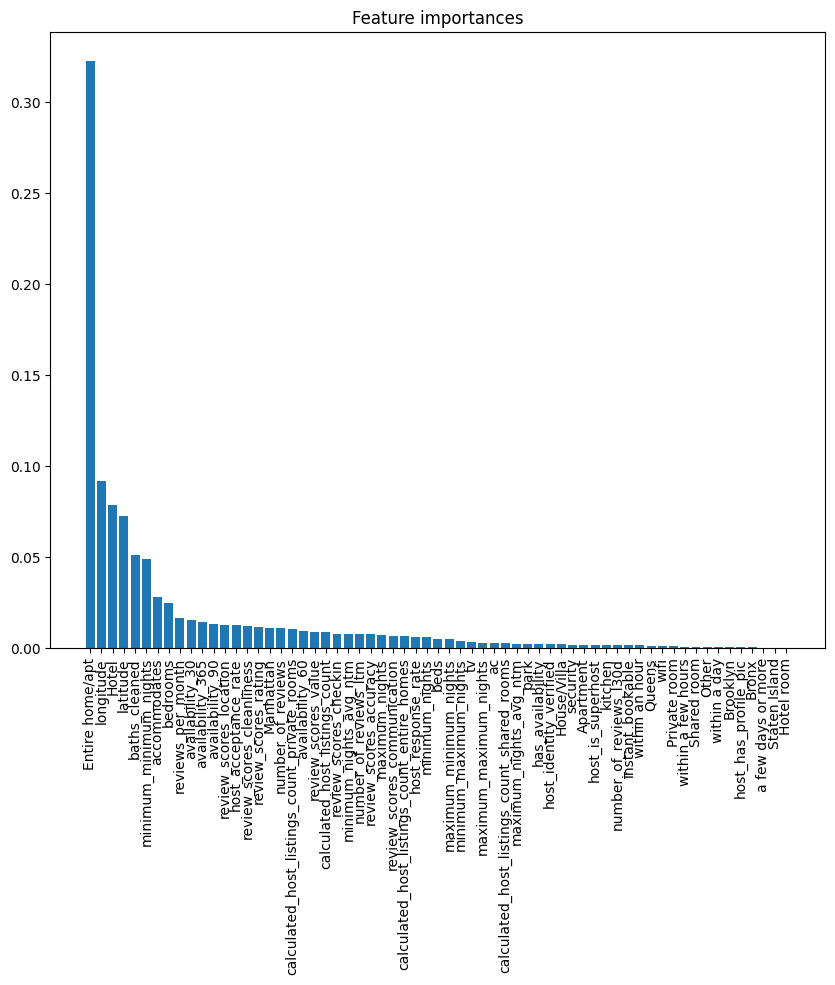

In [ ]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)

# get the feature importances from the trained model
importances = regressor.feature_importances_

# sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# plot the feature importances
plt.figure(figsize=(10, 8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), price_data_x.columns[indices], rotation=90)
plt.show()

## Model Implementation 

Linear Regression - Baseline

SVM 

Ensemble


Need:

RMSE - 0.2 to 0.5

R^2 - more than 0.6

In [ ]:
price_data.columns

Index(['id', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'latitude',
       'longitude', 'accommodates', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calc

In [ ]:
price_data_x.columns[indices]

Index(['Entire home/apt', 'longitude', 'Hotel', 'latitude', 'baths_cleaned',
       'minimum_minimum_nights', 'accommodates', 'bedrooms',
       'reviews_per_month', 'availability_30', 'availability_365',
       'availability_90', 'review_scores_location', 'host_acceptance_rate',
       'review_scores_cleanliness', 'review_scores_rating', 'Manhattan',
       'number_of_reviews', 'calculated_host_listings_count_private_rooms',
       'availability_60', 'review_scores_value',
       'calculated_host_listings_count', 'review_scores_checkin',
       'minimum_nights_avg_ntm', 'number_of_reviews_ltm',
       'review_scores_accuracy', 'maximum_nights',
       'review_scores_communication',
       'calculated_host_listings_count_entire_homes', 'host_response_rate',
       'minimum_nights', 'beds', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'tv', 'maximum_maximum_nights', 'ac',
       'calculated_host_listings_count_shared_rooms', 'maximum_nights_avg_ntm',
       'park', 'has_av

In [ ]:
feats = ['Entire home/apt', 'longitude', 'latitude', 'Hotel', 'baths_cleaned', 'accommodates', 'bedrooms',
       'review_scores_rating', 'reviews_per_month', 'availability_30', 'number_of_reviews',
       'host_acceptance_rate',
       'Manhattan', 'availability_60', 'calculated_host_listings_count',
       'maximum_nights', 
       'host_response_rate',
       'minimum_nights', 'beds', 'tv', 'ac', 'park',
       'has_availability', 'House/Villa', 'instant_bookable', 'security', 
       'host_is_superhost', 'Apartment', 'host_identity_verified',
       'within an hour', 'kitchen', 'Queens', 'wifi', 'within a few hours',
       'Private room', 'Shared room', 'within a day', 'Other', 'Brooklyn',
       'Bronx', 'a few days or more', 'Staten Island',
       'Hotel room']

In [ ]:
# x_feats = price_data_x.columns[indices][:11]
# X = price_data_x.loc[:,x_feats].values

In [ ]:
price_data_x.columns[indices]

Index(['Entire home/apt', 'longitude', 'Hotel', 'latitude', 'baths_cleaned',
       'minimum_minimum_nights', 'accommodates', 'bedrooms',
       'reviews_per_month', 'availability_30', 'availability_365',
       'availability_90', 'review_scores_location', 'host_acceptance_rate',
       'review_scores_cleanliness', 'review_scores_rating', 'Manhattan',
       'number_of_reviews', 'calculated_host_listings_count_private_rooms',
       'availability_60', 'review_scores_value',
       'calculated_host_listings_count', 'review_scores_checkin',
       'minimum_nights_avg_ntm', 'number_of_reviews_ltm',
       'review_scores_accuracy', 'maximum_nights',
       'review_scores_communication',
       'calculated_host_listings_count_entire_homes', 'host_response_rate',
       'minimum_nights', 'beds', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'tv', 'maximum_maximum_nights', 'ac',
       'calculated_host_listings_count_shared_rooms', 'maximum_nights_avg_ntm',
       'park', 'has_av

In [ ]:
from sklearn.model_selection import train_test_split

# split the data into train and test sets with a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()
regressor.fit(X_train, y_train)


# evaluate the model on the test data
score = regressor.score(X_test, y_test)
print(f"R^2 score: {score:.3f}")

# predict on the test set
y_pred = regressor.predict(X_test)

# calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.3f}")

R^2 score: 0.637
RMSE: 0.402


In [ ]:
from statsmodels.api import OLS
OLS(y, X).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_price   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          7.607e+04
Date:                Sun, 16 Apr 2023   Prob (F-statistic):                        0.00
Time:                        22:19:25   Log-Likelihood:                         -16083.
No. Observations:               31521   AIC:                                  3.229e+04
Df Residuals:                   31460   BIC:                                  3.280e+04
Df Model:                          61                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0009      0.000      2.457      0.014       0.000       0.002
x2            -0.0002      0.000     -1.566      0.117      -0.000    5.45e-05
x3             0.0439      0.006      7.332      0.000       0.032       0.056
x4            -0.0128      0.021     -0.605      0.545      -0.054       0.029
x5             0.0264      0.007      3.986      0.000       0.013       0.039
x6            -0.3308      0.066     -5.018      0.000      -0.460      -0.202
x7            -3.0784      0.070    -43.781      0.000      -3.216      -2.941
x8             0.0912      0.002     41.366      0.000       0.087       0.096
x9             0.1131      0.006     19.878      0.000       0.102       0.124
x10           -0.0154      0.004     -4.032      0.000      -0.023      -0.008
x11           -0.0058      0.000    -13.985      0.000      -0.007      -0.005
x12        -2.753e-10      2e-10     -1.380      0.168   -6.66e-10    1.16e-10
x13            0.0003      0.000      0.770      0.441      -0.000       0.001
x14        -3.834e-05      0.000     -0.086      0.931      -0.001       0.001
x15        -1.421e-10   4.04e-10     -0.352      0.725   -9.34e-10     6.5e-10
x16         5.808e-10    1.5e-10      3.878      0.000    2.87e-10    8.74e-10
x17            0.0035      0.001      6.633      0.000       0.002       0.005
x18        -1.944e-10   5.24e-10     -0.371      0.710   -1.22e-09    8.32e-10
x19            0.0162      0.009      1.892      0.058      -0.001       0.033
x20            0.0113      0.001     19.835      0.000       0.010       0.012
x21           -0.0021      0.001     -3.245      0.001      -0.003      -0.001
x22            0.0018      0.000      5.241      0.000       0.001       0.003
x23           -0.0002   2.55e-05     -6.491      0.000      -0.000      -0.000
x24           -0.0006   4.93e-05    -12.416      0.000      -0.001      -0.001
x25            0.0019      0.000      8.210      0.000       0.001       0.002
x26           -0.0076      0.002     -3.881      0.000      -0.012      -0.004
x27            0.0190      0.004      4.709      0.000       0.011       0.027
x28           -0.0212      0.010     -2.151      0.032      -0.040      -0.002
x29            0.1182      0.007     17.867      0.000       0.105       0.131
x30           -0.0645      0.009     -6.799      0.000      -0.083      -0.046
x31            0.0012      0.010      0.127      0.899      -0.017       0.020
x32            0.1395      0.008     18.102      0.000       0.124       0.155
x33           -0.0982      0.009    -11.313      0.000      -0.115      -0.081
x34            0.0237      0.006      3.785      0.000       0.011       0.036
x35           -0.0133      0.003     -4.039      0.000      -

In [ ]:
regressor = Ridge()

# fit the model to the training data
regressor.fit(X_train, y_train)

score = regressor.score(X_test, y_test)
print(f"R^2 score: {score:.3f}")

# predict on the test set
y_pred = regressor.predict(X_test)

# calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.3f}")

R^2 score: 0.637
RMSE: 0.402


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.89438e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
regressor = DecisionTreeRegressor(max_depth=15)
regressor.fit(X_train, y_train)

score = regressor.score(X_test, y_test)
print(f"R^2 score: {score:.3f}")

# predict on the test set
y_pred = regressor.predict(X_test)

# calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.3f}")

R^2 score: 0.591
RMSE: 0.427


In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

score = regressor.score(X_test, y_test)
print(f"R^2 score: {score:.3f}")

# predict on the test set
y_pred = regressor.predict(X_test)

# calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.3f}")

R^2 score: 0.760
RMSE: 0.327


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [15, 25, 80],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}


regressor = RandomForestRegressor()
grid_search = GridSearchCV(estimator = regressor, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

best_grid = grid_search.best_estimator_

Fitting 3 folds for each of 216 candidates, totalling 648 fits


In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=25, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=1000)

In [ ]:
rf = grid_search.best_estimator_
score = rf.score(X_test, y_test)
print(f"R^2 score: {score:.3f}")

# predict on the test set
y_pred = rf.predict(X_test)

# calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.3f}")

R^2 score: 0.716
RMSE: 0.355
